In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# 1. LOAD AND PREPROCESS THE DATA
# ---
# Load the Iris dataset [cite: 6] which contains 150 samples from three species.
iris = load_iris()
# Each sample has four features: sepal length, sepal width, petal length, and petal width[cite: 7, 8, 9, 10, 11].
X = iris.data
y = iris.target.reshape(-1, 1) # Reshape for the OneHotEncoder
target_names = iris.target_names

# One-Hot Encode the target labels (y) to be suitable for the softmax output layer.
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Split the dataset into 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better model performance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [15]:
# 2. DESIGN THE MLP MODEL
# ---
# Design a Multilayer Perceptron (MLP) model to classify the species[cite: 12].
model = tf.keras.models.Sequential([
    # An input layer with 4 neurons (one per feature) is implicitly created[cite: 15].
    # At least one hidden layer is required; we will use two for this model[cite: 16].
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    # An output layer with 3 neurons (one per class) and softmax activation[cite: 17].
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# 3. COMPILE THE MODEL
# ---
# Use a suitable optimizer ('Adam') and loss function ('categorical_crossentropy')[cite: 13].
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 4. TRAIN THE MODEL
# ---
# Train the model and store the history for later visualization.
print("\n--- Training Model ---")
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)
print("--- Model Training Complete ---")


--- Training Model ---
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0331 - loss: 1.1804 - val_accuracy: 0.0333 - val_loss: 1.1712
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0746 - loss: 1.1545 - val_accuracy: 0.0333 - val_loss: 1.1378
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0911 - loss: 1.1167 - val_accuracy: 0.0333 - val_loss: 1.1137
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1180 - loss: 1.0956 - val_accuracy: 0.0333 - val_loss: 1.0942
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1916 - loss: 1.0793 - val_accuracy: 0.0667 - val_loss: 1.0766
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2087 - loss: 1.0567 - val_accuracy: 0.1333 - val_loss: 1.0601
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2143 - loss: 1.0492 - val_accuracy: 0.3333 - val_loss: 1.0418
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2955 - loss: 1.0236 - val_acc

In [18]:
# 5. EVALUATE THE MLP
# ---
print("\n--- Evaluating Model Performance ---")

# Report accuracy on both training and testing sets[cite: 13].
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

# Generate predictions to create the confusion matrix and classification report.
y_pred_prob = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


--- Evaluating Model Performance ---
Training Accuracy: 92.50%
Testing Accuracy: 90.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


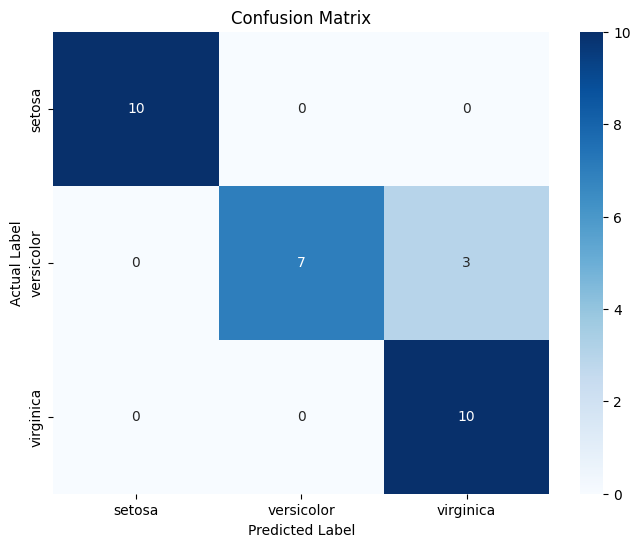

In [19]:
# Plot a confusion matrix[cite: 20].
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [20]:
# Print a classification report[cite: 20].
print("\n--- Classification Report ---")
print(classification_report(y_test_labels, y_pred_labels, target_names=target_names))


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.70      0.82        10
   virginica       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



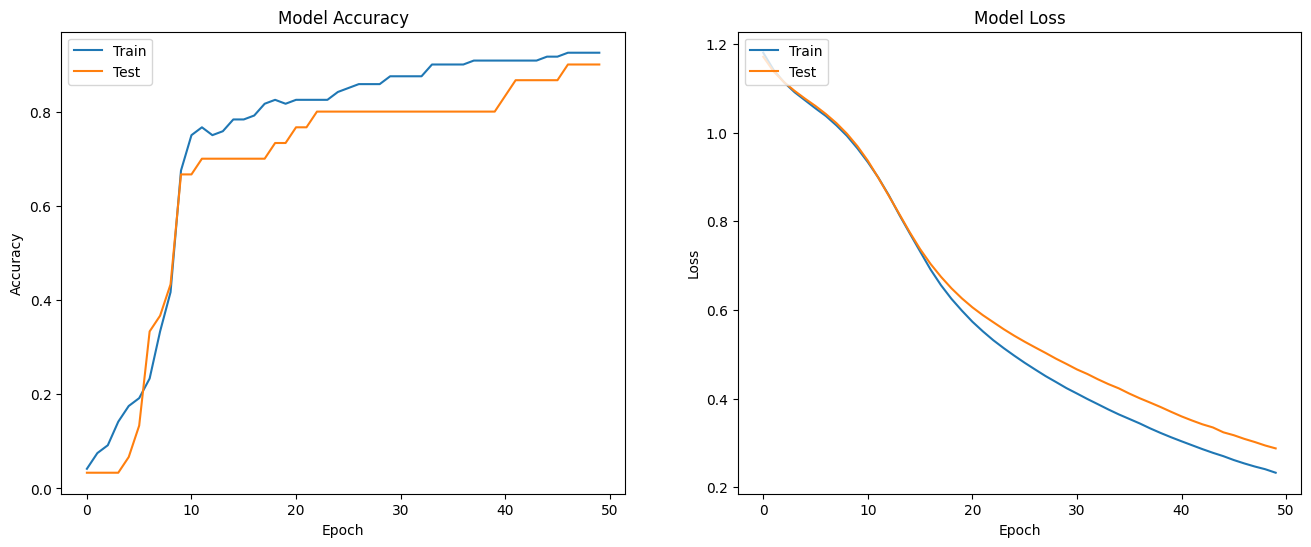

In [21]:
# Visualize training loss and accuracy over epochs[cite: 20].
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [22]:
# Final cell to print accuracy in the specified format
print(f"Accuracy:{test_accuracy*100:.2f}%")

Accuracy:90.00%
